In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_path = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeetUpdated.csv"
data = pd.read_csv(data_path)

Exracting Google Meet Number of Calls related metrics

In [3]:
CallsNo= data[["google.meet:num_calls","time","date","year","month"]].rename(columns = {"google.meet:num_calls": "CallsNumber"}) 
CallsNo.head(10)

,CallsNumber,time,date,year,month
0,0.0,2018-01-14T00:00:00.000-0500,2018-01-14,2018,1
1,0.0,2018-01-15T00:00:00.000-0500,2018-01-15,2018,1
2,0.0,2018-01-16T00:00:00.000-0500,2018-01-16,2018,1
3,0.0,2018-01-17T00:00:00.000-0500,2018-01-17,2018,1
4,0.0,2018-01-18T00:00:00.000-0500,2018-01-18,2018,1
5,0.0,2018-01-19T00:00:00.000-0500,2018-01-19,2018,1
6,0.0,2018-01-20T00:00:00.000-0500,2018-01-20,2018,1
7,0.0,2018-01-21T00:00:00.000-0500,2018-01-21,2018,1
8,0.0,2018-01-22T00:00:00.000-0500,2018-01-22,2018,1
9,0.0,2018-01-23T00:00:00.000-0500,2018-01-23,2018,1


Shape Of Data

In [3]:
CallsNo.shape

(543, 5)

Value counts is used to find the number of observations with metric value as 0,1,..
There are 146 observations with metric value as 0

In [4]:
counts = CallsNo.CallsNumber.value_counts()
counts.head(10)

0.0     146
6.0      10
1.0      10
54.0     10
53.0      9
4.0       8
10.0      8
49.0      8
68.0      8
23.0      8
Name: CallsNumber, dtype: int64

Finding number of negative metric_values using mask. There are no negative values

In [5]:
mask = (CallsNo.CallsNumber< 0)
CallsNo[mask].head()

,CallsNumber,time,date,year,month


Sorting using metric values in ascending order.

In [6]:
CallsNo.CallsNumber.sort_values().head(10)

0      0.0
94     0.0
95     0.0
96     0.0
97     0.0
99     0.0
100    0.0
93     0.0
101    0.0
103    0.0
Name: CallsNumber, dtype: float64

describe is used to get some useful information like number of metric values and least, highest metric value

In [7]:
CallsNo.CallsNumber.describe()

count    541.000000
mean      33.491682
std       33.481538
min        0.000000
25%        0.000000
50%       26.000000
75%       57.000000
max      159.000000
Name: CallsNumber, dtype: float64

Maximum number of calls count

In [8]:
CallsNo.loc[CallsNo.CallsNumber.idxmax()]

CallsNumber                             159
time           2019-03-21T00:00:00.000-0400
date                             2019-03-21
year                                   2019
month                                     3
Name: 406, dtype: object

Minimun value in dataframe

In [9]:
CallsNo.loc[CallsNo.CallsNumber.idxmin()]

CallsNumber                               0
time           2018-01-14T00:00:00.000-0500
date                             2018-01-14
year                                   2018
month                                     1
Name: 0, dtype: object

In [10]:
CallsNo.groupby(['CallsNumber', 'date' , 'time' , 'year','month']).count().tail(10)

Empty DataFrame
Columns: []
Index: [(112.0, 2019-02-21, 2019-02-21T00:00:00.000-0500, 2019, 2), (113.0, 2018-09-17, 2018-09-17T00:00:00.000-0400, 2018, 9), (113.0, 2019-02-20, 2019-02-20T00:00:00.000-0500, 2019, 2), (117.0, 2019-02-06, 2019-02-06T00:00:00.000-0500, 2019, 2), (119.0, 2019-04-03, 2019-04-03T00:00:00.000-0400, 2019, 4), (121.0, 2019-03-26, 2019-03-26T00:00:00.000-0400, 2019, 3), (127.0, 2019-06-17, 2019-06-17T00:00:00.000-0400, 2019, 6), (138.0, 2019-03-20, 2019-03-20T00:00:00.000-0400, 2019, 3), (144.0, 2019-02-05, 2019-02-05T00:00:00.000-0500, 2019, 2), (159.0, 2019-03-21, 2019-03-21T00:00:00.000-0400, 2019, 3)]

Number of observations for each year

In [11]:
CallsNo.year.value_counts()

2018    328
2019    215
Name: year, dtype: int64

Number of observations for each year

In [12]:
CallsNo.month.value_counts()

4     60
3     60
6     54
5     54
2     53
7     51
1     49
8     41
12    31
10    31
11    30
9     29
Name: month, dtype: int64

In [13]:
CallsNo['CallsNumber'].quantile(0)

0.0

Median of metric values

In [14]:
CallsNo['CallsNumber'].quantile(0.5)

26.0

Highest Metric values are around 39. Highest Number of calls in a day are 159

In [15]:
CallsNo['CallsNumber'].quantile(1.0)

159.0

Mean value is higher than median as we have major outliers in the high end

In [16]:
CallsNo['CallsNumber'].mean()

33.491682070240294

Mode of metric values. Total number of calls are zero for most of the days

In [17]:
CallsNo['CallsNumber'].mode()

0    0.0
dtype: float64

Quartile

minimum value (0th percentile),
first quartile (25th percentile),
the median - second quartile (50th percentile),
third quartile(75th percentile), and
maximum value (100th percentile)
using the quantile() function:

In [18]:
five_num = [CallsNo['CallsNumber'].quantile(0),   
            CallsNo['CallsNumber'].quantile(0.25),
            CallsNo['CallsNumber'].quantile(0.50),
            CallsNo['CallsNumber'].quantile(0.75),
            CallsNo['CallsNumber'].quantile(1)]

five_num

[0.0, 0.0, 26.0, 57.0, 159.0]

Interquartile (IQR) range - distance between the 3rd quartile and the 1st quartile

In [19]:
CallsNo['CallsNumber'].quantile(0.75) - CallsNo['CallsNumber'].quantile(0.25)

57.0

Box plots based on year, It is having Maximum Outliers

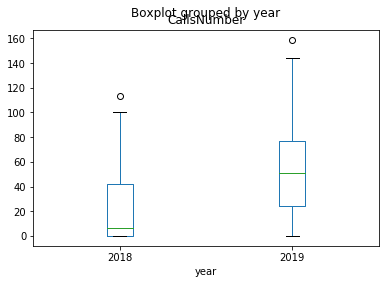

In [4]:
CallsNo.boxplot(by ='year', column =['CallsNumber'], grid = False) 

The variance of a distribution is the average of the squared deviations (differences) from the mean.

In [23]:
CallsNo['CallsNumber'].var()

1121.013356609845

Standard Deviation - square root of the variance.

In [24]:
CallsNo['CallsNumber'].std()

33.48153754847356

Variance and Standard Deviation are not the right measures of spread as our data is having extreme values. So, they are susceptible to the influence of data skew and outliers as both of them are derived from the mean.

Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median

Median absolute deviation is the right measure of spread for Number Of calls metric

In [26]:
abs_median_devs = abs(CallsNo['CallsNumber']- CallsNo['CallsNumber'].median())

abs_median_devs.median() * 1.4826

38.547599999999996